In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
 ! pip install xgboost                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [5]:
from xgboost import XGBRFClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
1601.2      1
1266.1      1
1311.3      1
5442.05     1
7854.15     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
df['TotalCharges'].replace(' ',np.nan,inplace=True)

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
TotalCharges_mean = df['TotalCharges'].mean()

In [14]:
df['TotalCharges'].fillna(TotalCharges_mean,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

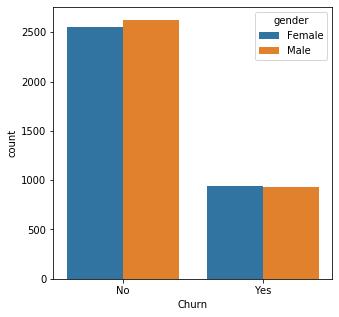

In [16]:
plt.figure(figsize=(5,5))
sns.countplot(data = df , x='Churn',hue='gender')
plt.show()

In [17]:
df.drop("customerID",axis=1,inplace= True)
df['tenure']  = df['tenure'].astype(float)
df_cat = df.select_dtypes(['object','int64'])
df_num = df.select_dtypes(['float64'])

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


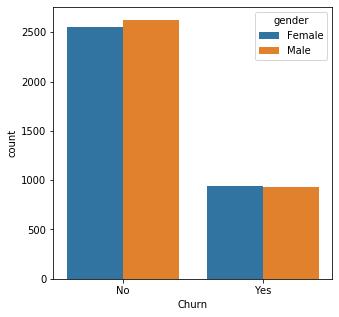

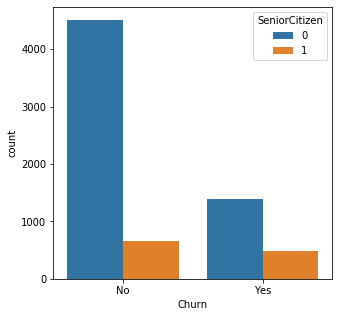

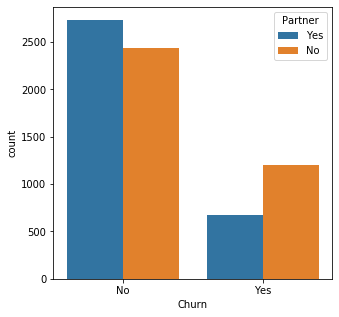

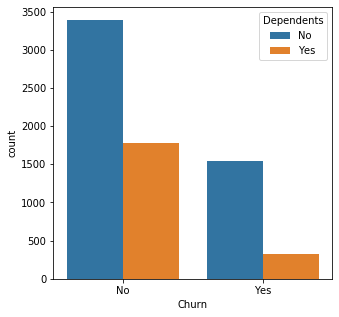

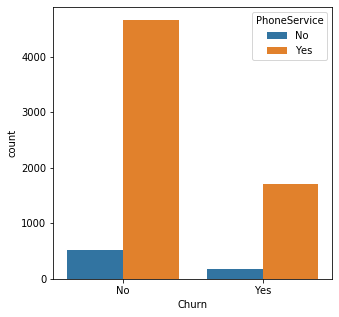

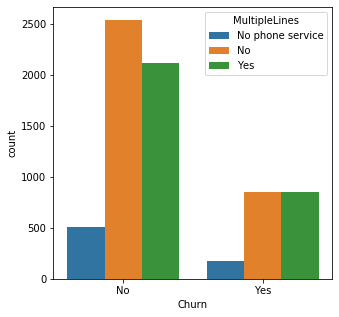

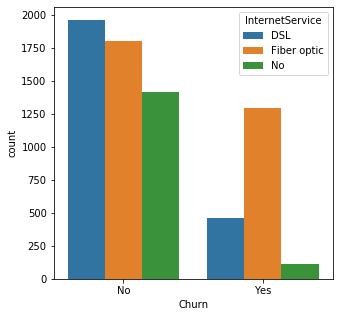

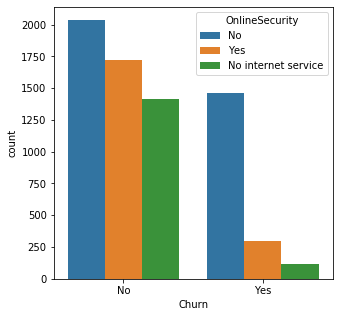

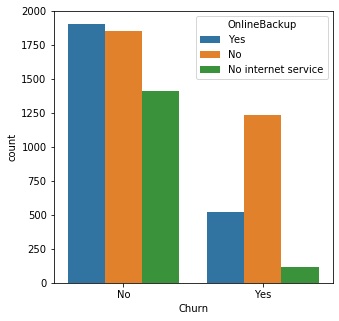

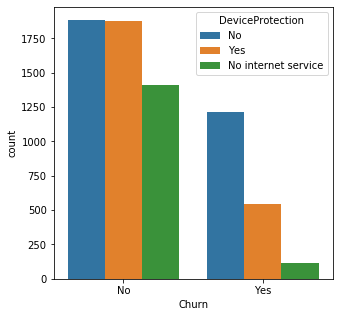

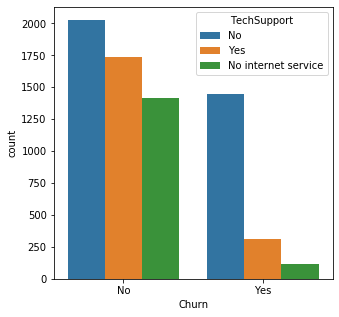

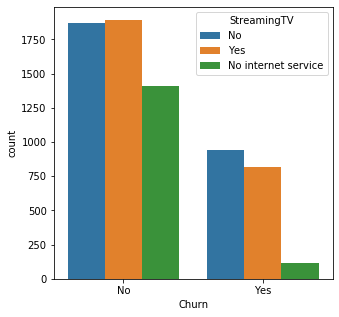

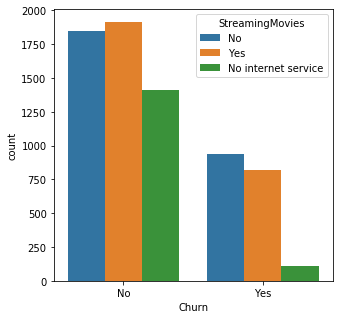

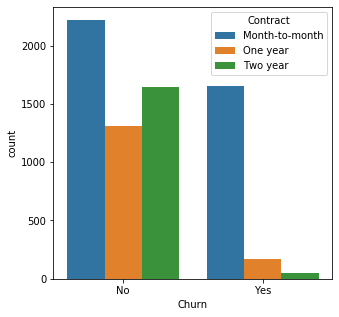

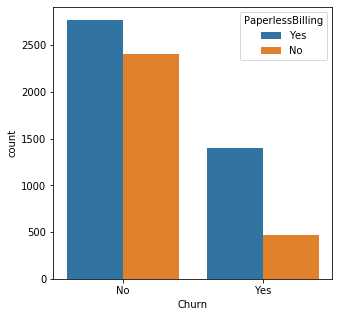

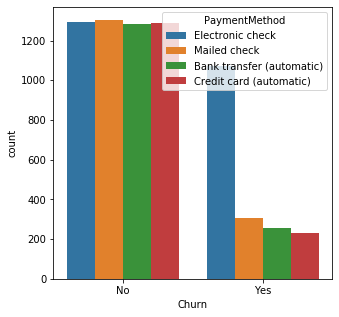

In [19]:
for i in df_cat:
    if i!= 'Churn':
        plt.figure(figsize=(5,5))
        sns.countplot(data = df,x='Churn',hue = i)
        plt.show()

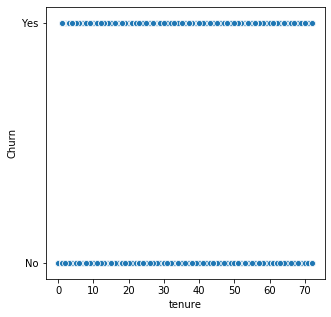

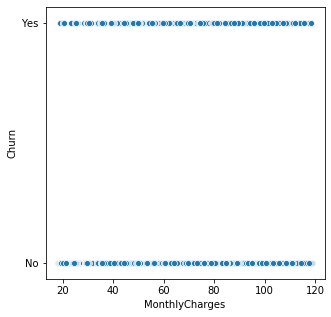

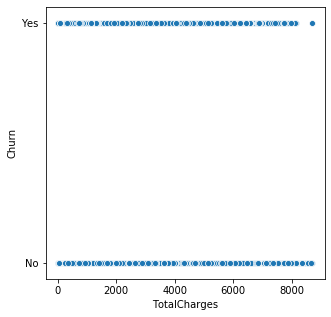

In [20]:
for i in df_num:
    plt.figure(figsize=(5,5))
    sns.scatterplot(df_num[i],df_cat['Churn'])
    plt.show()

In [21]:
df_cat.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
df_cat['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[[col]])

In [24]:
df_cat

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [25]:
df_cat['Dependents'].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

In [26]:
df_new = pd.concat([df_num,df_cat],axis = 1)

In [27]:
df_new

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,1.0,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,34.0,56.95,1889.50,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2.0,53.85,108.15,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,45.0,42.30,1840.75,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,2.0,70.70,151.65,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24.0,84.80,1990.50,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,72.0,103.20,7362.90,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,11.0,29.60,346.45,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,4.0,74.40,306.60,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


#### Logistic Regression

In [28]:
X = df_new.iloc[:,:-1]
Y = df_new.iloc[:,-1]

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size =0.3,random_state=1)

In [30]:
def classify(model,X_train,X_test,Y_train,Y_test):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    return model

In [31]:
lr =LogisticRegression()

In [32]:
classify(lr,X_train,X_test,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1585
           1       0.62      0.59      0.61       528

    accuracy                           0.81      2113
   macro avg       0.75      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [34]:
df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [35]:
anova = SelectKBest(score_func=f_regression,k=8)
x_train_f  = anova.fit_transform(X_train,Y_train)
x_test_f = anova.transform(X_test)
classify(lr,x_train_f,x_test_f,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1585
           1       0.62      0.60      0.61       528

    accuracy                           0.81      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.81      0.81      0.81      2113



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
anova.scores_


array([6.78283600e+02, 1.94743699e+02, 1.89998556e+02, 6.20554800e-01,
       1.12282180e+02, 9.94953886e+01, 1.14590516e+02, 1.67803843e+00,
       8.96278868e+00, 1.20592418e+01, 4.33813598e+02, 1.88828376e+02,
       1.59749338e+02, 4.09222757e+02, 7.91369289e+00, 5.21332890e+00,
       8.98443892e+02, 1.65266998e+02, 5.12096671e+01])

In [37]:
selected_feature = anova.get_support()

In [38]:
selected_feature

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
       False])

In [39]:
all_feature  = X.columns

 dic = {"all" : all_feature,"selected" : selected_feature}
pd.DataFrame(dic)

#### Decision Tree


In [41]:
dt = DecisionTreeClassifier()

In [42]:
classify(dt,X_train,X_test,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1585
           1       0.47      0.51      0.49       528

    accuracy                           0.74      2113
   macro avg       0.65      0.66      0.66      2113
weighted avg       0.74      0.74      0.74      2113



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
dt2 = DecisionTreeClassifier(max_depth=4)

In [44]:
classify(dt2,X_train,X_test,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1585
           1       0.56      0.70      0.62       528

    accuracy                           0.79      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.81      0.79      0.79      2113



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb = XGBClassifier(n_estimators=200)

In [47]:
classify(dt2,X_train,X_test,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1585
           1       0.56      0.70      0.62       528

    accuracy                           0.79      2113
   macro avg       0.72      0.76      0.74      2113
weighted avg       0.81      0.79      0.79      2113



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
xgb = XGBClassifier(n_estimators=200,reg_lambda=10)

In [49]:
classify(xgb,X_train,X_test,Y_train,Y_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.64      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [61]:
#! pip install -U imbalanced-learn

In [62]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [63]:
X_train


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
5925,20.0,68.70,1416.20,1,0,0,0,1,2,0,0,2,0,2,2,0,1,1,2
4395,69.0,103.95,7446.90,0,0,1,1,1,2,1,0,2,2,0,2,2,0,1,2
1579,12.0,80.45,950.20,1,1,1,0,1,0,1,0,0,0,0,0,2,0,1,2
1040,14.0,90.45,1266.10,1,1,0,0,1,0,1,0,0,0,0,2,2,0,0,1
1074,1.0,21.10,21.10,1,0,0,0,1,0,2,1,1,1,1,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,9.0,100.50,918.60,1,1,0,0,1,2,1,0,0,2,0,2,2,0,1,2
5192,60.0,19.95,1189.90,1,0,0,1,1,0,2,1,1,1,1,1,1,2,0,3
3980,28.0,105.70,2979.50,1,0,0,0,1,2,1,0,2,2,0,2,2,0,1,2
235,2.0,54.40,114.10,1,0,0,0,1,2,0,0,2,0,0,0,0,0,1,3


In [60]:
Y_train

5925    0
4395    1
1579    1
1040    1
1074    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: Churn, Length: 4930, dtype: int32

In [65]:
print('Before oversampler')
print(pd.Series(Y_train).value_counts())

ros =RandomOverSampler(random_state=1)
X_train_new,Y_train_new = ros.fit_sample(X_train,Y_train)

print('after oversampler')
print(pd.Series(Y_train_new).value_counts())

Before oversampler
0    3589
1    1341
Name: Churn, dtype: int64
after oversampler
1    3589
0    3589
dtype: int64


In [67]:
classify(dt2,X_train_new,X_test,Y_train_new,Y_test)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1585
           1       0.47      0.79      0.59       528

    accuracy                           0.73      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.73      0.74      2113



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [70]:
svc = LinearSVC(random_state=1)

In [72]:
classify(svc,X_train_new,X_test,Y_train_new,Y_test)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1585
           1       0.54      0.54      0.54       528

    accuracy                           0.77      2113
   macro avg       0.70      0.69      0.69      2113
weighted avg       0.77      0.77      0.77      2113



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)